# Importing Necessary Libraries

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df=pd.read_csv(r"D:\Github\Kaggle\datasets\Bakery.csv")

In [8]:
df.head(5)

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


# Data Exploration

In [9]:
print(f"The shape of the data is:{df.shape}\n")
print(f"The size of the data is:{df.size}\n")
print(f"The columns in the dataset is:{df.columns}")

The shape of the data is:(20507, 5)

The size of the data is:102535

The columns in the dataset is:Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType'], dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [11]:
df.describe()

,TransactionNo
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


# Data Cleaning 

In [12]:
# To check if there are any null values in the dataset
if df.isnull().any().any():
    print(f"Duplicates are present and there are {df.isnull.sum()} duplicate values")
else:
    print("There are no duplicates present in the dataset")

There are no duplicates present in the dataset


In [13]:
# To check if there are any duplicates
if df.duplicated().any():
    print(f"Duplicates are present and there are {df.duplicated().sum()} duplicate values")
else:
    print("There are no duplicates present in the dataset")

Duplicates are present and there are 1620 duplicate values


In [14]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)
print(f"The shape of the data is:{df.shape}\n")

The shape of the data is:(18887, 5)



<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


# Data Analysis

## 1. Transaction Analysis:

* What is the total number of transactions in the dataset?
* How many unique items are sold in the dataset?
* What is the average number of items per transaction?

In [15]:
total_transactions = df.shape[0]
print(f"The total number of transactions done is: {total_transactions}")

The total number of transactions done is: 18887


In [16]:
print(f"There are {df['Items'].nunique()} unique items sold.")

There are 94 unique items sold.


In [17]:
fig = px.histogram(df["Items"], nbins=1, title='Histogram Representing unique items', labels={'value': 'Number of Items'})

fig.update_layout(
    xaxis_title='Items',
    yaxis_title='Frequency',
    bargap=0.25, 
    barmode='overlay',  
    template='ggplot2'  
)

fig.update_traces(marker_color='orange', marker_line_color='black', marker_line_width=1)

fig.show()

In [18]:
average_items_per_transaction = df['Items'].nunique() /df.shape[0]

print(f"The average number of items per transaction is: {average_items_per_transaction}")

The average number of items per transaction is: 0.004976968285063801


## Conclusion

> * The total number of transaction done is 18887.
> * There are 94 unique items sold.
> * The average number of items per transaction is: 0.004976968285063801.


<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


## 2. Item Insights:

* What are the top-selling items in terms of quantity?
* What are the least popular items?

In [19]:
items=df['Items'].value_counts().reset_index()
print(f"The top 5 highest selling items in terms of quantity are: \n \n {items.head()}")

The top 5 highest selling items in terms of quantity are: 
 
     Items  count
0  Coffee   4528
1   Bread   3097
2     Tea   1350
3    Cake    983
4  Pastry    815


In [20]:
print(f"The top 10 least selling items in terms of quantity are: \n \n {items.tail(10)}")

The top 10 least selling items in terms of quantity are: 
 
               Items  count
84  Chimichurri Oil      2
85         Siblings      2
86     Chicken sand      1
87         The BART      1
88       Adjustment      1
89            Bacon      1
90     Gift voucher      1
91   Olum & polenta      1
92         Raw bars      1
93          Polenta      1


<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


## 3. DateTime Analysis:

* What is the time range covered by the dataset?
* Can you identify peak hours for transactions during the day?
* Are there specific days or time periods with higher transaction volumes?

In [21]:
# To convert DateTime column to datetime datatype
df['DateTime']=pd.to_datetime(df['DateTime'])

# Create date column
df["Date"]=df["DateTime"].dt.date

# Create time column
df["Time"]=df["DateTime"].dt.time

df['Hour']=df['DateTime'].dt.hour

df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time,Hour
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30,09:58:11,9
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34,10
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10


In [22]:
max_time = df['DateTime'].max()
min_time = df['DateTime'].min()

print(f"The minimum time is: {min_time}")
print(f"The maximum time is: {max_time}")

The minimum time is: 2016-01-11 07:51:20
The maximum time is: 2017-12-03 16:28:00


In [23]:
hour_sales=df["Hour"].value_counts().reset_index()
hour_sales.head(5)

,Hour,count
0,11,2837
1,12,2639
2,13,2440
3,14,2433
4,10,2407


In [24]:
day_transaction=df.groupby('Daypart')['TransactionNo'].count().reset_index()
day_transaction.sort_values(by=['TransactionNo'],ascending=False)

,Daypart,TransactionNo
0,Afternoon,10687
2,Morning,7697
1,Evening,490
3,Night,13


In [25]:
fig=px.bar(day_transaction,x='Daypart',y="TransactionNo",title="Bar chart representing number of transactions across day")
fig.show()

## Conclusion

> The transactions in the dataset span a time range from January 11, 2016, at 07:51:20 (earliest) to December 3, 2017, at 16:28:00 (latest). This time frame provides an overview of the duration covered by the dataset.

> The highest count of transactions is observed at Hour 11, with 2,837 transactions.Following closely, Hour 12 and Hour 13 also have substantial transaction counts, with 2,639 and 2,440 transactions, respectively.

> The highest count of transactions is observed during the Afternoon, with 10,687 transactions.
Morning follows with a substantial transaction count of 7,697.

<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


## 4. Daypart and DayType Trends:

* How do the number of transactions vary across different dayparts (e.g., morning, afternoon, evening)?
* Is there a difference in transaction patterns between weekdays and weekends?
* Which daypart and day type combination has the highest transaction frequency?

In [26]:
daypart_frequency = df['Daypart'].value_counts().reset_index().rename(columns={'index': 'Daypart', 'count': 'Frequency'})
daypart_frequency

,Daypart,Frequency
0,Afternoon,10687
1,Morning,7697
2,Evening,490
3,Night,13


In [27]:
fig = px.pie(daypart_frequency, names='Daypart', values='Frequency', title='Daypart Frequency Distribution')

#customizing the plot
fig = px.pie(daypart_frequency, 
             names='Daypart', 
             values='Frequency', 
             title='Daypart Frequency Distribution',
             color_discrete_sequence=px.colors.qualitative.Set3,  # Set color palette
             hole=0.4,  # Adjust the size of the center hole
             labels={'Daypart': 'Daypart Category', 'Frequency': 'Count'},  # Rename axis labels
               # Set plot template (dark mode)
            )

# Show the plot
fig.show()

In [28]:
df.groupby('DayType')['Daypart'].count()

DayType
Weekday    11830
Weekend     7057
Name: Daypart, dtype: int64

In [29]:
transaction_counts = df.groupby(['Daypart', 'DayType']).size().reset_index(name='TransactionCount')

# Find the combination with the highest transaction frequency
max_transaction_combination = transaction_counts.loc[transaction_counts['TransactionCount'].idxmax()]

print(f"The daypart and day type combination with the highest transaction frequency is:")
print(max_transaction_combination[['Daypart', 'DayType']])

The daypart and day type combination with the highest transaction frequency is:
Daypart    Afternoon
DayType      Weekday
Name: 0, dtype: object


## Conclusion
> The majority of transactions occur in the afternoon, with a count of 10,687.
Morning transactions follow closely behind with a count of 7,697.
Evening transactions are lower in comparison, with a count of 490.
Night transactions are the least frequent, with only 13 recorded.

> Weekdays have a higher transaction count, with 11,830 recorded transactions.
Weekends show a lower but still significant transaction count, with 7,057 recorded transactions.

> The daypart and day type combination with the highest transaction frequency is Afternoon and Weekday.

<hr style="height: 4px; color: #333; background-color: #333; margin: 20px 0;">


In [30]:
# To add the year column
df['Year']=df['DateTime'].dt.year
df

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time,Hour,Year
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30,09:58:11,9,2016
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34,10,2016
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10,2016
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10,2016
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57,10,2016
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04,14:32:58,14,2017
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04,14:32:58,14,2017
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04,14:57:06,14,2017
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04,14:57:06,14,2017


In [31]:
fig = px.sunburst(df,
    path=['DayType', 'Daypart', 'Year', 'Hour'],
    values='TransactionNo',
    color='Hour'  # Change the color parameter to 'Hour'
)

fig.show()

# Non- parametric tests

Non-parametric tests are statistical tests that do not rely on specific assumptions about the distribution of the data. They are used when data does not meet the assumptions required for parametric tests or when dealing with ordinal or categorical data.

In [32]:
from scipy.stats import mannwhitneyu

morning_hours = df[df['Daypart'] == 'Morning']['Hour']
afternoon_hours = df[df['Daypart'] == 'Afternoon']['Hour']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(morning_hours, afternoon_hours)

# Print results
print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:  # Adjust significance level as needed
    print("There is a significant difference between Morning and Afternoon groups.")
else:
    print("There is no significant difference between Morning and Afternoon groups.")


Mann-Whitney U Statistic: 0.0
P-value: 0.0
There is a significant difference between Morning and Afternoon groups.


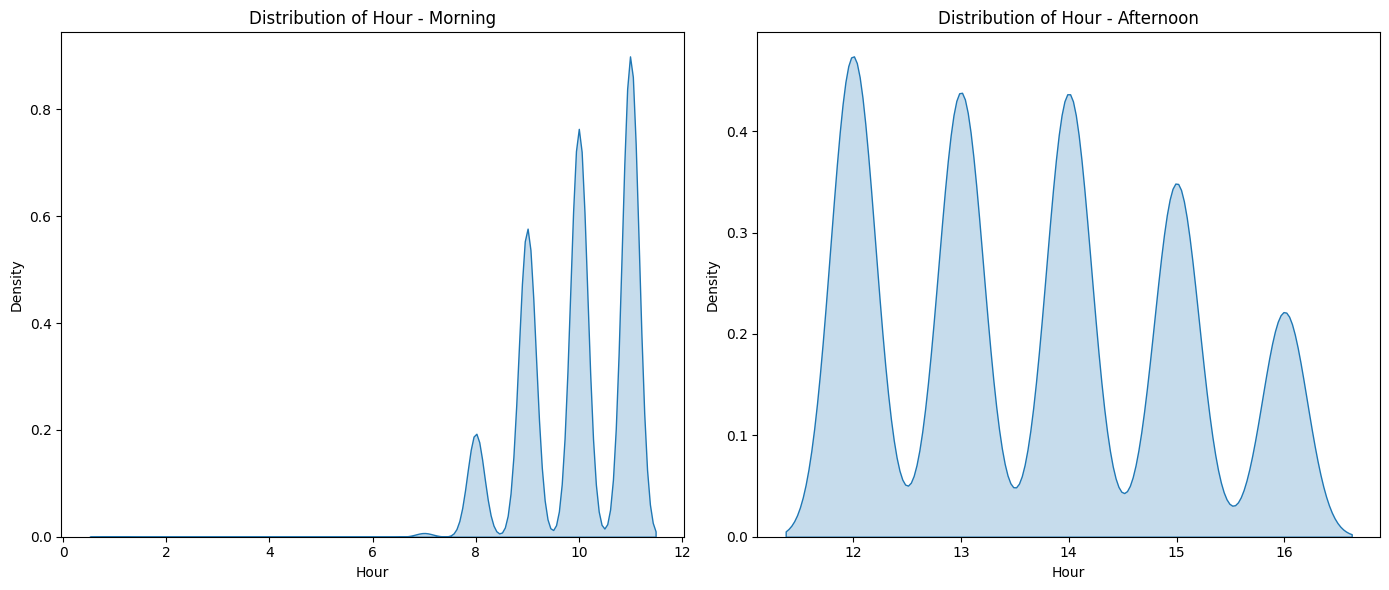

In [33]:
morning_hours = df[df['Daypart'] == 'Morning']['Hour']
afternoon_hours = df[df['Daypart'] == 'Afternoon']['Hour']

# Set up the figure and axis for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Kernel Density Plot for Morning
sns.kdeplot(morning_hours, label='Morning', fill=True, ax=axes[0])
axes[0].set_title('Distribution of Hour - Morning')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Density')

# Kernel Density Plot for Afternoon
sns.kdeplot(afternoon_hours, label='Afternoon', fill=True, ax=axes[1])
axes[1].set_title('Distribution of Hour - Afternoon')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Conclusion

> The analysis suggests that there is a statistically significant difference in the distribution of Hour between the Morning and Afternoon groups. The exact nature of this difference can be observed in the visualizations, where the kernel density plots highlight variations in the density of transactions during different hours of the day.